<a href="https://colab.research.google.com/github/AbihaOmer/Adv.Programming2024/blob/main/flower_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/roses/4754734410_94d98463a5.jpg'),
 PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8032328803_30afac8b07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7285188160_49d84b95a3_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg')]

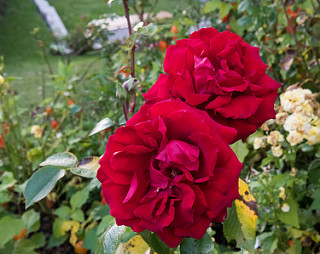

In [9]:
PIL.Image.open(str(roses[2]))

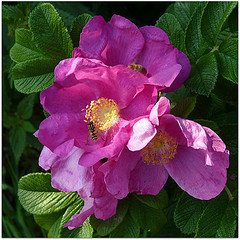

In [10]:
PIL.Image.open(str(roses[234]))

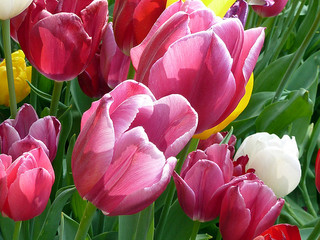

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

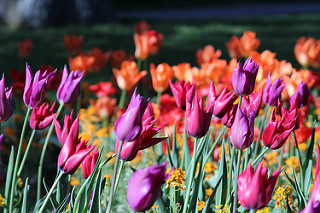

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[456]))

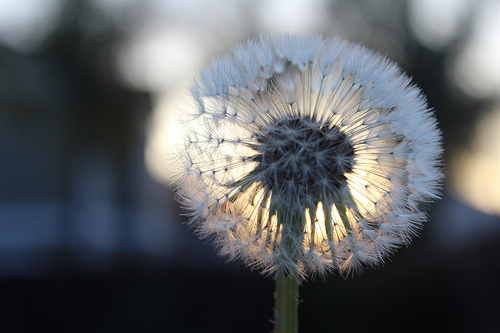

In [17]:
dandelion= list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[78]))

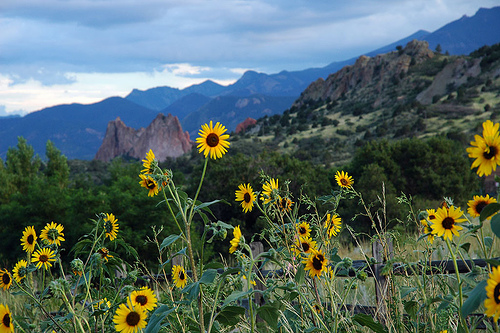

In [21]:
sunflowers= list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[345]))

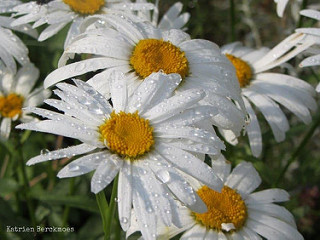

In [27]:
daisy= list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[222]))

In [29]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),}

In [30]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [31]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg')]

In [32]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7302931078_30054c1970_n.jpg'

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][4]))

In [34]:
img.shape

(333, 500, 3)

In [35]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [36]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [37]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [38]:
y[:5]

[0, 0, 0, 0, 0]

In [41]:
y[:5678]

array([0, 0, 0, ..., 4, 4, 4])

In [39]:
X = np.array(X)
y = np.array(y)

In [42]:
X.shape

(3670, 180, 180, 3)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [45]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 [==============================] - 90s 1s/step - loss: 1.4018 - accuracy: 0.3921
Epoch 2/20
86/86 [==============================] - 85s 993ms/step - loss: 1.0176 - accuracy: 0.5908
Epoch 3/20
86/86 [==============================] - 87s 1s/step - loss: 0.7833 - accuracy: 0.6999
Epoch 4/20
86/86 [==============================] - 86s 996ms/step - loss: 0.5957 - accuracy: 0.7823
Epoch 5/20
45/86 [==============>...............] - ETA: 41s - loss: 0.3729 - accuracy: 0.8750

KeyboardInterrupt: 